# OpenCV_이미지 분할

## 에지 검출

### Canny 알고리즘

In [1]:
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

edges1 = cv2.Canny(src, 50, 100)
edges2 = cv2.Canny(src, 50, 200)
 
cv2.imshow('edges1',  edges1)
cv2.imshow('edges2',  edges2)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_gray = cv2.imread("./data/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# 캐니 경계선 감지기를 적용
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()


### Shi-Tomasi 모서리 탐지기

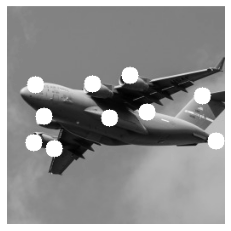

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread('./data/plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 감지할 모서리 개수 설정
corners_to_detect = 10
#모서리가 될 최소 품질(0-1)
minimum_quality_score = 0.05
#모서리 사이의 최소 거리(유클리디안 거리)
minimum_distance = 25

# 모서리를 감지
corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)
corners = np.float32(corners)
# 모서리마다 흰 원을 그림
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (int(x),int(y)), radius=10, color=(255,255,255), thickness=-1)

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(image_rgb, cmap='gray'), plt.axis("off")
plt.show()

### 허프 변환

In [ ]:
import cv2
import numpy as np

src = cv2.imread('./data/rect.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 100)
lines = cv2.HoughLines(edges, rho=1, theta=np.pi / 180.0, threshold=100)
print('lines.shape=', lines.shape)

for line in lines:
    rho, theta = line[0]
    c = np.cos(theta)
    s = np.sin(theta)
    x0 = c * rho
    y0 = s * rho
    x1 = int(x0 + 1000 * (-s))
    y1 = int(y0 + 1000 * (c))
    x2 = int(x0 - 1000 * (-s))
    y2 = int(y0 - 1000 * (c))
    cv2.line(src, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2.imshow('edges',  edges)
cv2.imshow('src',  src)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

src = cv2.imread('./data/rect.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 100)
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180.0, threshold=100)
print('lines.shape=', lines.shape)

for line in lines:
    x1, y1, x2, y2   = line[0]
    cv2.line(src,(x1,y1),(x2,y2),(0,0,255),2)
    
cv2.imshow('edges',  edges)
cv2.imshow('src',  src)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

#1
src1 = cv2.imread('./data/circles.jpg')
gray1 = cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
circles1 = cv2.HoughCircles(gray1, method = cv2.HOUGH_GRADIENT,
            dp=1, minDist=50, param2=15)

print('circles1.shape=', circles1.shape)
for circle in circles1[0,:]:
    cx, cy, r  = circle
    cv2.circle(src1, (int(cx), int(cy)), int(r), (0,0,255), 2)
cv2.imshow('src1',  src1)

#2
src2 = cv2.imread('./data/circles2.jpg')
gray2 = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
circles2 = cv2.HoughCircles(gray2, method = cv2.HOUGH_GRADIENT,
          dp=1, minDist=50, param2=15, minRadius=30, maxRadius=100)

print('circles2.shape=', circles2.shape)
for circle in circles2[0,:]:
    cx, cy, r  = circle
    cv2.circle(src2, (int(cx), int(cy)), int(r), (0,0,255), 2)
cv2.imshow('src2',  src2)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
import numpy as np, cv2, math

def draw_houghLines(src, lines, nline):
    dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)  # 컬러 영상 변환
    min_length = min(len(lines), nline)

    for i in range(min_length):
        rho, radian = lines[i, 0, 0:2]  # 수직거리 , 각도 - 3차원 행렬임
        a, b = math.cos(radian), math.sin(radian)
        pt = (a * rho, b * rho)  # 검출 직선상의 한 좌표 계산
        delta = (-1000 * b, 1000 * a)  # 직선상의 이동 위치
        pt1 = np.add(pt, delta).astype('int')
        pt2 = np.subtract(pt, delta).astype('int')
        cv2.line(dst, tuple(pt1), tuple(pt2), (0, 255, 0), 2, cv2.LINE_AA)

    return dst

image = cv2.imread('./data/hough.jpg', cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일 읽기 에러")
blur  = cv2.GaussianBlur(image, (5, 5), 2, 2)
canny = cv2.Canny(blur, 100, 200, 5)

rho, theta = 1,  np.pi / 180
lines = cv2.HoughLines(canny, rho, theta, 80)
dst = draw_houghLines(canny, lines, 7)

cv2.imshow("image", image)
cv2.imshow("canny", canny)
cv2.imshow("detected lines", dst)
cv2.waitKey(0)

In [ ]:
import numpy as np, cv2, math

def draw_houghLines(src, lines, nline):
    dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)  # 컬러 영상 변환
    min_length = min(len(lines), nline)

    for i in range(min_length):
        rho, radian = lines[i, 0, 0:2]  # 수직거리 , 각도 - 3차원 행렬임
        a, b = math.cos(radian), math.sin(radian)
        pt = (a * rho, b * rho)  # 검출 직선상의 한 좌표 계산
        delta = (-1000 * b, 1000 * a)  # 직선상의 이동 위치
        pt1 = np.add(pt, delta).astype('int')
        pt2 = np.subtract(pt, delta).astype('int')
        cv2.line(dst, tuple(pt1), tuple(pt2), (0, 255, 0), 2, cv2.LINE_AA)

    return dst

def detect_maxObject(img):
    # 외곽선 검출 - Opnecv 4.0부터 반환값은 2개 원소 갖는 튜플
    results = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if int(cv2.__version__[0]) >= 4:                # Opnecv 4.0은 2원소 튜플 반환
        contours = results[0]
    else:
        contours = results[1]				# OpenCV 3.x은 3원소 튜플 반환

    areas = [cv2.contourArea(c) for c in contours]
    idx = np.argsort(areas)
    max_rect = contours[idx[-1]]

    rect = cv2.boundingRect(max_rect)        # 외곽선을 모두 포함하는 사각형 반환
    rect = np.add(rect, (-10, -10, 20, 20))   # 검출 객체 사각형 크기 확대
    return rect

image = cv2.imread('./data/harness.jpg', cv2.IMREAD_COLOR)
if image is None: raise Exception("영상 파일 읽기 에러")
rho, theta = 1, np.pi / 180                             # 허프변환 거리간격, 각도간격
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)          # 명암도 영상 변환
_, th_gray = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY) # 이진 영상 변환
kernel = np.ones((3, 3), np.uint8)
morph = cv2.erode(th_gray, kernel, iterations=2)        # 침식 연산 - 2번 반복

x, y, w, h = detect_maxObject(np.copy(morph))               # 가장 큰 객체 검출
roi = th_gray[y:y+h, x:x+w]

canny = cv2.Canny(roi, 40, 100)                         # 캐니 에지 검출
lines = cv2.HoughLines(canny, rho, theta, 50)         # OpenCV 함수

cv2.rectangle(morph, (x, y, w, h), 100, 2)                   # 큰 객체 사각형 표시
canny_line = draw_houghLines(canny, lines, 1)           # 직선 표시

angle = (np.pi - lines[0, 0, 1]) * 180 / np.pi           # 회전 각도 계산
h, w = image.shape[:2]
center = (w//2, h//2)                           # 입력 영상의 중심점
rot_map = cv2.getRotationMatrix2D(center, -angle, 1)    # 반대방향 회전 행렬 계산
dst = cv2.warpAffine(image, rot_map, (w, h), cv2.INTER_LINEAR)  # 역회전 수행

cv2.imshow("image", image)
cv2.imshow("morph", morph)
cv2.imshow("line_detect", canny_line)
cv2.resizeWindow("line_detect", 250, canny_line.shape[0])
cv2.imshow("dst", dst)
cv2.waitKey(0)

## 모서리 감지

### 해리스 코너 알고리즘

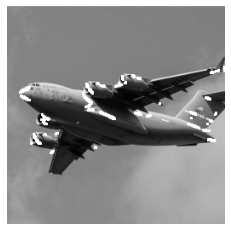

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread("./data/plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# 모서리 감지 매개변수를 설정
block_size = 2
aperture = 29
free_parameter = 0.04

# 모서리를 감지
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)
# 모서리 표시를 부각
detector_responses = cv2.dilate(detector_responses, None)

# 임계값보다 큰 감지 결과만 남기고 흰색으로 표시
threshold = 0.02
image_bgr[detector_responses >
          threshold *
          detector_responses.max()] = [255,255,255]

# 흑백으로 변환
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 이미지를 출력
plt.imshow(image_gray, cmap="gray")
plt.axis("off")
plt.show()

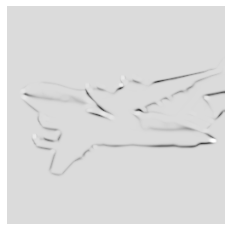

In [5]:
# 가능성이 높은 모서리만 출력
plt.imshow(detector_responses, cmap='gray')
plt.axis("off")
plt.show()

### Shi-Tomasi 모서리 탐지기

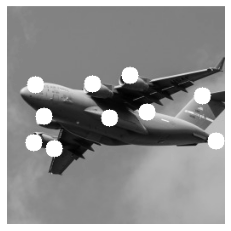

In [6]:
image_bgr = cv2.imread('./data/plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 감지할 모서리 개수 설정
corners_to_detect = 10
#모서리가 될 최소 품질(0-1)
minimum_quality_score = 0.05
#모서리 사이의 최소 거리(유클리디안 거리)
minimum_distance = 25

# 모서리를 감지
corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)
corners = np.float32(corners)
# 모서리마다 흰 원을 그림
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (int(x),int(y)), radius=10, color=(255,255,255), thickness=-1)

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(image_rgb, cmap='gray'), plt.axis("off")
plt.show()


## 색 공간 분할

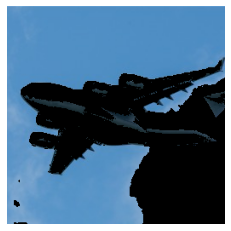

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지를 로드
image_bgr = cv2.imread('./data/plane_256x256.jpg')

# BGR에서 HSV로 변환
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# HSV에서 파랑 값의 범위를 정의
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

# 마스크를 생성
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# 이미지에 마스크를 적용
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

# BGR에서 RGB로 변환
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# 이미지를 출력
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


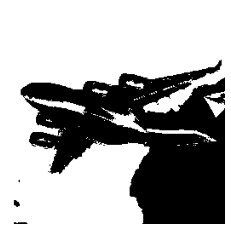

In [8]:
# 마스크를 출력
plt.imshow(mask, cmap='gray')
plt.axis("off")
plt.show()

### 컬러 영역 검출

In [9]:
import cv2
import numpy as np

#1
src1 = cv2.imread('./data/hand.jpg')
hsv1 = cv2.cvtColor(src1, cv2.COLOR_BGR2HSV)
lowerb1 = (0, 40, 0)
upperb1 = (20, 180, 255)
dst1 = cv2.inRange(hsv1, lowerb1, upperb1)

#2
src2 = cv2.imread('./data/flower.jpg')
hsv2 = cv2.cvtColor(src2,cv2.COLOR_BGR2HSV)
lowerb2 = (150, 100, 100)
upperb2 = (180, 255, 255)
dst2 = cv2.inRange(hsv2, lowerb2, upperb2)

#3
cv2.imshow('src1',  src1)
cv2.imshow('dst1',  dst1)
cv2.imshow('src2',  src2)
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

## 윤곽선 검출

In [ ]:
import cv2
import numpy as np

#1
src = np.zeros(shape=(512,512,3), dtype=np.uint8)
cv2.rectangle(src, (50, 100), (450, 400), (255, 255, 255), -1)
cv2.rectangle(src, (100, 150), (400, 350), (0, 0, 0), -1)
cv2.rectangle(src, (200, 200), (300, 300), (255, 255, 255), -1)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

#2
mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
##method =cv2.CHAIN_APPROX_NONE

contours, hierarchy = cv2.findContours(gray, mode, method)

print('type(contours)=', type(contours))
print('type(contours[0])=', type(contours[0]))
print('len(contours)=', len(contours))
print('contours[0].shape=', contours[0].shape)
print('contours[0]=', contours[0])

#3
cv2.drawContours(src, contours, -1, (255,0,0), 3) # 모든 윤곽선

#4
for pt in contours[0][:]: # 윤곽선 좌표
    cv2.circle(src, (pt[0][0], pt[0][1]), 5, (0,0,255), -1)

cv2.imshow('src',  src)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

#1
src = np.zeros(shape=(512,512,3), dtype=np.uint8)
cv2.rectangle(src, (50, 100), (450, 400), (255, 255, 255), -1)
cv2.rectangle(src, (100, 150), (400, 350), (0, 0, 0), -1)
cv2.rectangle(src, (200, 200), (300, 300), (255, 255, 255), -1)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

#2
mode = cv2.RETR_LIST
method = cv2.CHAIN_APPROX_SIMPLE;
contours, hierarchy = cv2.findContours(gray, mode, method)
##cv2.drawContours(src, contours, -1, (255,0,0), 3) # 모든 윤곽선

print('len(contours)=', len(contours))
print('contours[0].shape=', contours[0].shape)
print('contours=', contours)

#3
for cnt in contours:
    cv2.drawContours(src, [cnt], 0, (255,0,0), 3)
    
    for pt in cnt: # 윤곽선 좌표
        cv2.circle(src, (pt[0][0], pt[0][1]), 5, (0,0,255), -1)

cv2.imshow('src',  src)
cv2.waitKey()
cv2.destroyAllWindows()

## 영역 채우기

In [ ]:
import cv2
import numpy as np

#1
src = np.full((512,512,3), (255, 255, 255), dtype= np.uint8)
cv2.rectangle(src, (50, 50), (200, 200), (0, 0, 255), 2)
cv2.circle(src, (300, 300), 100, (0,0,255), 2)

#2
dst = src.copy()
cv2.floodFill(dst, mask=None, seedPoint=(100,100), newVal=(255,0,0))

#3
retval, dst2, mask, rect=cv2.floodFill(dst, mask=None,
                          seedPoint=(300,300), newVal=(0,255,0))
print('rect=', rect)
x, y, width, height = rect
cv2.rectangle(dst2, (x,y), (x+width, y+height), (255, 0, 0), 2)

cv2.imshow('src',  src)
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 거리 계산

In [ ]:
import cv2
import numpy as np

#1
src = np.zeros(shape=(512,512), dtype=np.uint8)
cv2.rectangle(src, (50, 200), (450, 300), (255, 255, 255), -1)

#2
dist  = cv2.distanceTransform(src, distanceType=cv2.DIST_L1, maskSize=3)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist)
print('src:', minVal, maxVal, minLoc, maxLoc)

dst = cv2.normalize(dist, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
ret, dst2 = cv2.threshold(dist, maxVal-1, 255, cv2.THRESH_BINARY)

#3 
gx = cv2.Sobel(dist, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(dist, cv2.CV_32F, 0, 1, ksize = 3)
mag   = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('src:', minVal, maxVal, minLoc, maxLoc)
ret, dst3 = cv2.threshold(mag, maxVal-2, 255, cv2.THRESH_BINARY_INV)

cv2.imshow('src',  src)
cv2.imshow('dst',  dst)
cv2.imshow('dst2',  dst2)
cv2.imshow('dst3',  dst3)
cv2.waitKey()
cv2.destroyAllWindows()


## watershed 영상 분할

In [ ]:
import cv2
import numpy as np

#1
src = cv2.imread('./data/hand.jpg')
##src = cv2.imread('./data/flower.jpg')
mask   = np.zeros(shape=src.shape[:2], dtype=np.uint8)
markers= np.zeros(shape=src.shape[:2], dtype=np.int32)
dst = src.copy()
cv2.imshow('dst',dst)

#2
def onMouse(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.circle(param[0], (x, y), 10, (255, 255, 255), -1)
            cv2.circle(param[1], (x, y), 10, (255, 255, 255), -1) 
    cv2.imshow('dst', param[1])    
##cv2.setMouseCallback('dst', onMouse, [mask, dst])

#3
mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
while True:
    cv2.setMouseCallback('dst', onMouse, [mask, dst]) #3-1
    key = cv2.waitKey(30) # cv2.waitKeyEx(30)
    
    if key == 0x1B: 
        break;
    elif key == ord('r'): #3-2
        mask[:,:] = 0        
        dst = src.copy()
        cv2.imshow('dst',dst)        
    elif key == ord(' '): #3-3
        contours, hierarchy = cv2.findContours(mask, mode, method)
        print('len(contours)=', len(contours))
        markers[:,:] = 0  
        for i, cnt in enumerate(contours):
            cv2.drawContours(markers, [cnt], 0, i+1, -1)
        cv2.watershed(src,  markers)

        #3-4        
        dst = src.copy()
        dst[markers == -1] = [0,0,255] # 경계선
        for i in range(len(contours)): # 분할영역 
          r = np.random.randint(256)
          g = np.random.randint(256)
          b = np.random.randint(256)
          dst[markers == i+1] = [b, g, r]

        dst = cv2.addWeighted(src, 0.4, dst, 0.6, 0) # 합성
        cv2.imshow('dst',dst)        
cv2.destroyAllWindows()

## distanceTransform, watershed 영상 분할


In [ ]:
import cv2
import numpy as np

#1
src = cv2.imread('./data/circles2.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, bImage = cv2.threshold(gray, 0, 255,
                                cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist  = cv2.distanceTransform(bImage, cv2.DIST_L1, 3)
dist8 = cv2.normalize(dist, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2.imshow('bImage',bImage)
cv2.imshow('dist8',dist8)

#2
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist)
print('dist:', minVal, maxVal, minLoc, maxLoc)
mask = (dist > maxVal*0.5).astype(np.uint8)*255
cv2.imshow('mask',mask)
#3
mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(mask, mode, method)
print('len(contours)=', len(contours))

markers= np.zeros(shape=src.shape[:2], dtype=np.int32)
for i, cnt in enumerate(contours):
    cv2.drawContours(markers, [cnt], 0, i+1, -1)

#4
dst = src.copy()
cv2.watershed(src,  markers)

dst[markers == -1] = [0, 0, 255] # 경계선
for i in range(len(contours)): # 분할영역
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[markers == i+1] = [b, g, r]
dst = cv2.addWeighted(src, 0.4, dst, 0.6, 0) # 합성        
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()


## 피라미드 영상 분할

In [ ]:
import cv2
import numpy as np
#1
src = cv2.imread('./data/lena.jpg')

down2 = cv2.pyrDown(src)
down4 = cv2.pyrDown(down2)
print('down2.shape=', down2.shape)
print('down2.shape=', down2.shape)

#2
up2 = cv2.pyrUp(src)
up4 = cv2.pyrUp(up2)
print('up2.shape=', up2.shape)
print('up4.shape=', up4.shape)

cv2.imshow('down2',down2)
##cv2.imshow('down4',down4)
cv2.imshow('up2',up2)
##cv2.imshow('up4',up4)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
#1
def floodFillPostProcess(src, diff=(2,2,2)):
    img = src.copy()
    rows, cols = img.shape[:2]
    mask   = np.zeros(shape=(rows+2, cols+2), dtype=np.uint8)
    for y in range(rows):
        for x in range(cols):
            if mask[y+1, x+1] == 0:
                r = np.random.randint(256)
                g = np.random.randint(256)
                b = np.random.randint(256)
                cv2.floodFill(img,mask,(x,y),(b,g,r),diff,diff)
    return img

#2
src = cv2.imread('./data/flower.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
dst  = floodFillPostProcess(src)
dst2 = floodFillPostProcess(hsv)
cv2.imshow('src',src)
cv2.imshow('hsv',hsv)
cv2.imshow('dst',dst)
cv2.imshow('dst2',dst2)
#3
res = cv2.pyrMeanShiftFiltering(src, sp=5, sr=20, maxLevel=4)
dst3 = floodFillPostProcess(res)

#4
term_crit=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 2)
res2=cv2.pyrMeanShiftFiltering(hsv,sp=5,sr=20,maxLevel=4, termcrit=term_crit)
dst4 = floodFillPostProcess(res2)

cv2.imshow('res',res)
cv2.imshow('res2',res2)
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)
cv2.waitKey()
cv2.destroyAllWindows()

## 컬러 클러스터링 분할

In [ ]:
import cv2
import numpy as np
#1
src = cv2.imread('./data/hand.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
data = src.reshape((-1,3)).astype(np.float32)

#2
K = 2
term_crit=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, labels, centers = cv2.kmeans(data, K, None, term_crit, 5,
                                  cv2.KMEANS_RANDOM_CENTERS)
print('centers.shape=', centers.shape)
print('labels.shape=', labels.shape)
print('ret=', ret)

#3
centers = np.uint8(centers)
res   = centers[labels.flatten()]
dst  = res.reshape(src.shape)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 연결 요소 검출

In [ ]:
import cv2
import numpy as np

#1
src = cv2.imread('./data/circles.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
ret, res = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

#2
ret, labels = cv2.connectedComponents(res)
print('ret=', ret)

#3
dst   = np.zeros(src.shape, dtype=src.dtype)
for i in range(1, ret): # 분할영역 표시
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[labels == i] = [b, g, r]

cv2.imshow('res',  res)
cv2.imshow('dst',  dst) 
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

#1
src = cv2.imread('./data/circles.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
ret, res = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

#2
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(res)
print('ret =', ret)
print('stats =', stats)
print('centroids =', centroids)

#3
dst   = np.zeros(src.shape, dtype=src.dtype)
for i in range(1, int(ret)): # 분할영역 표시
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[labels == i] = [b, g, r]
#4    
for i in range(1, int(ret)):
    x, y, width, height, area = stats[i]
    cv2.rectangle(dst, (x,y), (x+width, y+height), (0, 0, 255), 2)

    cx, cy = centroids[i]
    cv2.circle(dst, (int(cx), int(cy)), 5, (255,0,0), -1)
       
cv2.imshow('src',  src)
cv2.imshow('dst',  dst) 
cv2.waitKey()
cv2.destroyAllWindows()


## 영상 워핑

In [ ]:
import numpy as np, cv2

def morphing():
    h, w = image.shape[:2]
    dst = np.zeros((h, w), image.dtype)
    ys = np.arange(0, image.shape[0], 1)
    xs = np.arange(0, image.shape[1], 0.1)

    x1, x10 = pt1[0] , pt1[0]*10
    ratios = xs / x1
    ratios[x10:] = (w - xs[x10:]) / (w-x1)

    dxs = xs + ratios * (pt2[0] - pt1[0])
    xs, dxs = xs.astype(int), dxs.astype(int)

    ym, xm = np.meshgrid(ys, xs)
    _, dxm = np.meshgrid(ys, dxs)
    dst[ym, dxm] = image[ym, xm]
    cv2.imshow("image", dst)

def onMouse(event, x, y, flags, param):
    global pt1, pt2
    if event == cv2.EVENT_LBUTTONDOWN:
        pt1 = (x, y)                               # 드래그 시작 좌표
    elif event == cv2.EVENT_LBUTTONUP:
        pt2 = (x, y)                               # 드래그 종료 좌표
        morphing()                                 # 드래그 종료 시 워핑 변환 수행
    elif event == cv2.EVENT_RBUTTONDBLCLK:
        pt1 = pt2 = (-1, -1)
        cv2.imshow("image", image)                 # 오른쪽 버튼 더블 클릭 시 원복

image = cv2.imread('./data/warp.jpg', cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일 읽기 에러")

pt1 = pt2 = (-1, -1)
cv2.imshow("image", image)
cv2.setMouseCallback("image", onMouse, 0)          # 마우스 콜백 함수 등록
cv2.waitKey(0)

In [1]:
import cv2
help(cv2.matchTemplate)

Help on built-in function matchTemplate:

matchTemplate(...)
    matchTemplate(image, templ, method[, result[, mask]]) -> result
    .   @brief Compares a template against overlapped image regions.
    .   
    .   The function slides through image , compares the overlapped patches of size \f$w \times h\f$ against
    .   templ using the specified method and stores the comparison results in result . #TemplateMatchModes
    .   describes the formulae for the available comparison methods ( \f$I\f$ denotes image, \f$T\f$
    .   template, \f$R\f$ result, \f$M\f$ the optional mask ). The summation is done over template and/or
    .   the image patch: \f$x' = 0...w-1, y' = 0...h-1\f$
    .   
    .   After the function finishes the comparison, the best matches can be found as global minimums (when
    .   #TM_SQDIFF was used) or maximums (when #TM_CCORR or #TM_CCOEFF was used) using the
    .   #minMaxLoc function. In case of a color image, template summation in the numerator and each sum i